# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [33]:
api_key

'ce3cd7fd4430442a92995557837d5655'

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
# forloop that allows you to extract the data from the website

weather_data = []
for i,city_name in enumerate(cities[:350], start = 1):
    url = "https://api.openweathermap.org/data/2.5/weather?q=" + city_name + "&APPID=" + api_key
    content = requests.get(url).json() 
    if int(content['cod']) == 404:
        print('City not found')
        continue
    print('Processing city number {}: name {}'.format(i, city_name))
    weather_data.append([content['name'], content['clouds']['all'], content['sys']['country'], content['dt'], content['main']['humidity'], content['coord']['lat'], content['coord']['lon'],content['main']['temp_max'], content['wind']['speed']])

# Creating the dataframe that will be both exported as a csv file and converted as dataframe to create the charts
summary_table = pd.DataFrame(weather_data, columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

export_csv = summary_table.to_csv(r"C:/Users/HP 13-AD004LA/Desktop/MBA/Columbia Engineering/2-Python & Data Analytics/Homework 6/06-Python-APIs/Instructions/starter_code/Weather_DB_gsaez.csv")

#C:/Users/HP 13-AD004LA/Desktop/MBA/Columbia Engineering/2-Python & Data Analytics/Homework 6/06-Python-APIs/Instructions/starter_code

print(summary_table)

Processing city number 1: name new norfolk
Processing city number 2: name rabo de peixe
Processing city number 3: name jacareacanga
Processing city number 4: name namibe
Processing city number 5: name bluff
Processing city number 6: name saint-philippe
Processing city number 7: name kaitangata
Processing city number 8: name fort nelson
Processing city number 9: name bambous virieux
Processing city number 10: name san felipe
Processing city number 11: name atuona
Processing city number 12: name tiruchchirappalli
Processing city number 13: name belmonte
City not found
Processing city number 15: name bosaso
Processing city number 16: name nouadhibou
Processing city number 17: name dryden
Processing city number 18: name lagoa
Processing city number 19: name itagiba
Processing city number 20: name oktyabrskiy
Processing city number 21: name kavaratti
Processing city number 22: name fairbanks
Processing city number 23: name pundaguitan
Processing city number 24: name ushuaia
Processing city 

Processing city number 213: name katsuura
Processing city number 214: name tunceli
Processing city number 215: name prado
City not found
Processing city number 217: name krasnoyarskiy
Processing city number 218: name alugan
Processing city number 219: name mount gambier
Processing city number 220: name kokoda
Processing city number 221: name saint george
Processing city number 222: name ketchikan
Processing city number 223: name lompoc
Processing city number 224: name buchanan
Processing city number 225: name lorengau
City not found
Processing city number 227: name swinoujscie
Processing city number 228: name narsaq
Processing city number 229: name kruisfontein
Processing city number 230: name paso de los toros
Processing city number 231: name tasiilaq
Processing city number 232: name bonthe
Processing city number 233: name broome
Processing city number 234: name vao
City not found
City not found
Processing city number 237: name codrington
Processing city number 238: name cabanas
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
for city_name in cities[:250]:
    url = "https://api.openweathermap.org/data/2.5/weather?q=" + city_name + "&APPID=" + api_key
    content = requests.get(url).json() 
    print(content)
    break

{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 277.28, 'pressure': 1008, 'humidity': 93, 'temp_min': 275.37, 'temp_max': 280.37}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1567717259, 'sys': {'type': 1, 'id': 9545, 'message': 0.0076, 'country': 'AU', 'sunrise': 1567715459, 'sunset': 1567756214}, 'timezone': 36000, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}


In [51]:
type(summary_table)

pandas.core.frame.DataFrame

In [52]:
summary_table.dtypes.value_counts()

float64    4
int64      3
object     2
dtype: int64

In [54]:
display(summary_table.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Cloudiness,312.0,5.291987e+01,38.597894,0.000000e+00,1.475000e+01,5.650000e+01,9.025000e+01,1.000000e+02
Date,312.0,1.567717e+09,145.621479,1.567717e+09,1.567717e+09,1.567717e+09,1.567717e+09,1.567717e+09
Humidity,312.0,7.176603e+01,20.619187,1.400000e+01,6.100000e+01,7.700000e+01,8.800000e+01,1.000000e+02
Lat,312.0,2.120096e+01,34.257447,-5.481000e+01,-4.542500e+00,2.599000e+01,4.978250e+01,7.822000e+01
Lng,312.0,1.848436e+01,91.745390,-1.739800e+02,-6.267000e+01,2.522500e+01,9.768250e+01,1.793200e+02
Max Temp,312.0,2.920101e+02,8.760746,2.732550e+02,2.850300e+02,2.925725e+02,2.987800e+02,3.133550e+02
Wind Speed,312.0,3.680513e+00,2.515228,1.000000e-02,1.770000e+00,3.100000e+00,4.740000e+00,1.455000e+01


In [55]:
summary_table = pd.DataFrame(weather_data, columns = ['City', 'Cloudiness', 'Country', 'Date', 
                                           'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
summary_table.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,New Norfolk,40,AU,1567717259,93,-42.78,147.06,280.370,3.10
1,Rabo de Peixe,40,PT,1567717021,82,37.80,-25.58,294.820,3.60
2,Jacareacanga,0,BR,1567717021,62,-6.22,-57.76,305.150,1.00
3,Namibe,99,AO,1567717227,89,-15.19,12.15,291.155,4.07
4,Bluff,0,AU,1567717281,31,-23.58,149.07,290.755,1.72
5,Saint-Philippe,1,CA,1567717281,43,45.36,-73.48,295.150,4.10
6,Kaitangata,100,NZ,1567717022,80,-46.28,169.85,280.370,7.60
7,Fort Nelson,20,CA,1567716685,40,58.81,-122.69,293.150,4.10
8,Bambous Virieux,20,MU,1567717022,83,-20.34,57.76,294.150,0.50
9,San Felipe,100,CL,1567717022,97,-32.75,-70.73,287.040,0.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

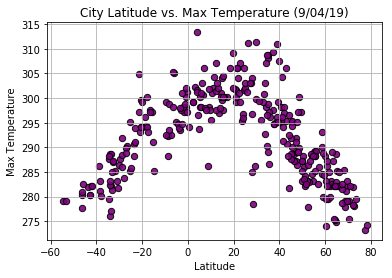

In [56]:
city_latitude_x = summary_table.loc[:,'Lat']

max_temp_y = summary_table.loc[:,'Max Temp']

plt.scatter(city_latitude_x, 
    max_temp_y, marker = "o", c = "purple", edgecolors = "black", s = 40, alpha = 0.9)

plt.title('City Latitude vs. Max Temperature (9/04/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

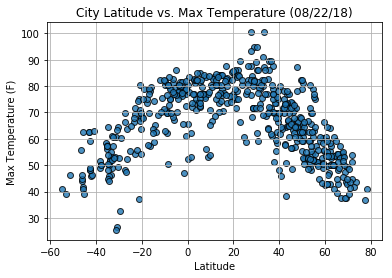

In [6]:
# Chart generated in the homework example (it has more datapoints than my chart since it has more information)

#### Latitude vs. Humidity Plot

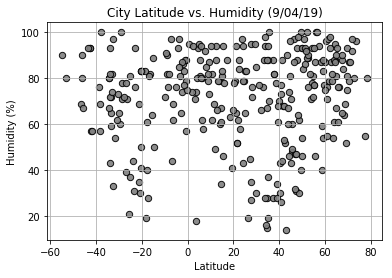

In [57]:
city_latitude_x = summary_table.loc[:,'Lat']

humidity_y = summary_table.loc[:,'Humidity']

plt.scatter(city_latitude_x, 
    humidity_y, marker = "o", c = "gray", edgecolors = "black", s = 40, alpha = 0.9)

plt.title('City Latitude vs. Humidity (9/04/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

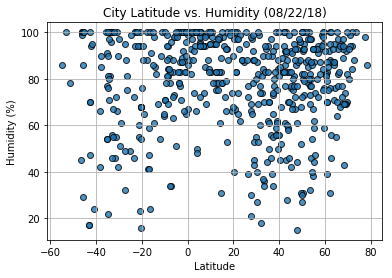

In [7]:
# Chart generated in the homework example (it has more datapoints than my chart since it has more information)

#### Latitude vs. Cloudiness Plot

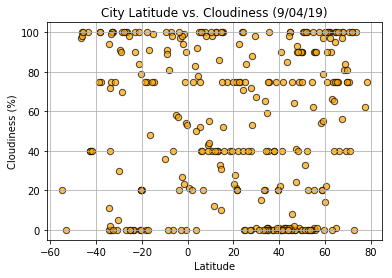

In [58]:
city_latitude_x = summary_table.loc[:,'Lat']

cloud_y = summary_table.loc[:,'Cloudiness']

plt.scatter(city_latitude_x, 
    cloud_y, marker = "o", c = "orange", edgecolors = "black", s = 40, alpha = 0.7)

plt.title('City Latitude vs. Cloudiness (9/04/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

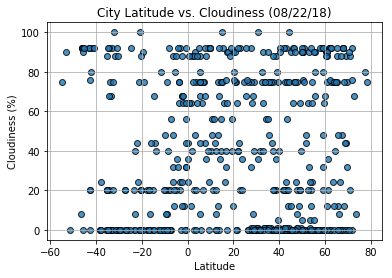

In [8]:
# Chart generated in the homework example (it has more datapoints than my chart since it has more information)

#### Latitude vs. Wind Speed Plot

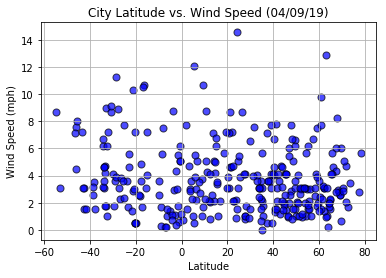

In [59]:
city_latitude_x = summary_table.loc[:,'Lat']

wind_y = summary_table.loc[:,'Wind Speed']

plt.scatter(city_latitude_x, 
    wind_y, marker = "o", c = "blue", edgecolors = "black", s = 50, alpha = 0.7)

plt.title('City Latitude vs. Wind Speed (04/09/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

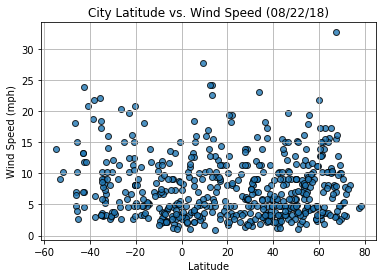

In [9]:
# Chart generated in the homework example (it has more datapoints than my chart since it has more information)